In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('default')

In [2]:
def number_of_zeros(x):
    for i in range(x.size):
        if x[i] != 0:
            return i
    return 0

In [3]:
df1 = pd.read_csv('../data/raw/step_10ms.csv', header=None)
data_array = np.array(df1)
delta_tempo_array = (data_array[:,0] << 16) + (data_array[:,1] << 8) + data_array[:,2]
qnt_zeros = number_of_zeros(delta_tempo_array)
freq_array_step_10ms_111V = np.zeros(delta_tempo_array.shape)
freq_array_step_10ms_111V[qnt_zeros:] = 1/7/(delta_tempo_array[qnt_zeros:]*1e-5) * (2*np.pi) # removido os zeros de "delta_tempo_array" 
entrada_array_step_10ms_111V = (data_array[:,3]-125)/(249-125) * 11.1
df2 = pd.DataFrame([entrada_array_step_10ms_111V,freq_array_step_10ms_111V]).T
df2.to_csv('../data/entrada_saida_step_10ms_111V.csv',header=False,index=False)

In [4]:
qnt_zeros

15

In [5]:
delta_tempo_array[qnt_zeros-1:]

array([    0, 14714,  1559, ...,    57,    55,    55])

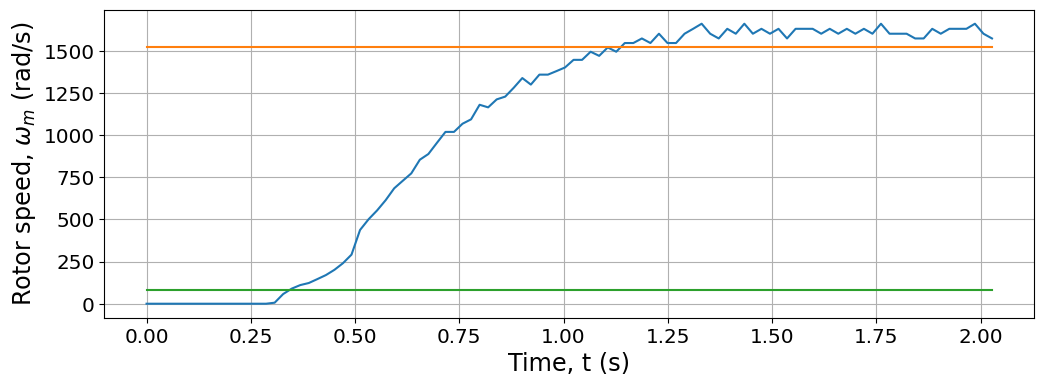

In [6]:
T1 = 0
T2 = 100
t = np.arange(0,entrada_array_step_10ms_111V.size)*0.02048

plt.figure(2,figsize=[12,4])
plt.grid(True)
#plt.ylim([0,2000])
#plt.xlim([-1,61])
plt.xticks(fontsize='x-large')
plt.yticks(fontsize='x-large')
plt.xlabel('Time, t (s)',fontsize='xx-large')
plt.ylabel('Rotor speed, $\omega_m$ (rad/s)',fontsize='xx-large')

plt.plot(t[T1:T2],freq_array_step_10ms_111V[T1:T2])
plt.plot(t[T1:T2],freq_array_step_10ms_111V[200:].mean()*np.ones(freq_array_step_10ms_111V[T1:T2].shape)*0.95)
plt.plot(t[T1:T2],freq_array_step_10ms_111V[200:].mean()*np.ones(freq_array_step_10ms_111V[T1:T2].shape)*0.05)
#plt.legend(fontsize='xx-large')
#plt.savefig(fname='../figures/step_10ms_111V.png')

In [7]:
ss_value = freq_array_step_10ms_111V[200:].mean()
lower_lim = ss_value*0.05
upper_lim = ss_value*0.95

dist_lower_lim = np.abs(freq_array_step_10ms_111V - lower_lim)
dist_upper_lim = np.abs(freq_array_step_10ms_111V - upper_lim)

freq_lower_lim = freq_array_step_10ms_111V[dist_lower_lim==np.min(dist_lower_lim)]
time_lower_lim = t[dist_lower_lim==np.min(dist_lower_lim)]
freq_upper_lim = freq_array_step_10ms_111V[dist_upper_lim==np.min(dist_upper_lim)]
time_upper_lim = t[dist_upper_lim==np.min(dist_upper_lim)]

rising_time = time_upper_lim - time_lower_lim
wn = 1.8/rising_time

In [8]:
print(freq_lower_lim)
print(time_lower_lim)
print(freq_upper_lim)
print(time_upper_lim)
print(rising_time)
print(wn)

[89.58062884]
[0.34816]
[1521.35237462]
[1.10592]
[0.75776]
[2.3754223]


sample_rate => [0.076,0.19]s => ts = 0.1s

w_max = wn => w_max = 2.3 rad/s

w_min = wn/10 => w_min = 0.23 rad/s